In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from clean_dataset import import_csv_data

In [ ]:
file_path = 'data\properties06191148_modified.csv'
raw_df = import_csv_data(file_path)
raw_df


#### Change columns names

In [5]:
raw_df.columns

Index(['zimmo code', 'type', 'price', 'street', 'number', 'postcode', 'city',
       'living area(m²)', 'ground area(m²)', 'bedroom', 'bathroom', 'garage',
       'garden', 'EPC(kWh/m²)', 'renovation obligation', 'year built',
       'mobiscore', 'url'],
      dtype='object')

In [6]:
def join_column_names(df:pd) -> None:
    columns_new_names = dict()
    for column in df.columns:
        s = "_".join(column.split())
        if s != column:
            columns_new_names[column] = s

    df.rename(columns=columns_new_names, inplace=True)

In [12]:
join_column_names(raw_df)

#### Duplicates

In [4]:
raw_df[raw_df.duplicated()]

,zimmo code,type,price,street,number,postcode,city,living area(m²),ground area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation obligation,year built,mobiscore,url


In [7]:
len(raw_df)

25403

In [8]:
raw_df.drop_duplicates(subset=['zimmo code'], inplace=True)

In [9]:
len(raw_df)

25403

In [30]:
raw_df.head()

,zimmo code,type,price,street,number,postcode,city,living area(m²),ground area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation obligation,year built,mobiscore,url
0,L97OB,Vakantiewoning (Huis),25000.0,NaN,NaN,8620,Nieuwpoort,35.0,128.0,2.0,1.0,NaN,False,NaN,False,NaN,7.0,https://www.zimmo.be/nl/nieuwpoort-8620/te-koo...
1,L9SVC,Appartement,45000.0,NaN,NaN,5570,Beauraing,62.0,NaN,2.0,1.0,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/beauraing-5570/te-koop...
2,LA02N,Rijwoning (Huis),45000.0,Oudestraat,94,9600,Ronse,NaN,232.0,2.0,1.0,NaN,False,716.0,True,1850.0,7.3,https://www.zimmo.be/nl/ronse-9600/te-koop/hui...
3,L4X2D,Vakantiewoning (Huis),40000.0,Molenheidestraat,7,3530,Helchteren,45.0,NaN,NaN,NaN,NaN,False,NaN,False,NaN,5.3,https://www.zimmo.be/nl/helchteren-3530/te-koo...
4,L9KJ7,Eengezinswoning (Huis),49900.0,Route Napoléon,10,4400,Ivoz-Ramet,123.0,8885.0,2.0,1.0,NaN,False,569.0,NaN,NaN,NaN,https://www.zimmo.be/nl/ivoz-ramet-4400/te-koo...


#### Bedroom

In [ ]:
raw_df['bedroom'].describe()


count    22287.000000
mean         3.144030
std          1.762147
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         79.000000
Name: bedroom, dtype: float64

In [39]:
# Null values
number_of_nan_bedrooms = len(raw_df[raw_df['bedroom'].isna()])
number_of_nan_bedrooms

3116

#### Bathroom

In [42]:
raw_df['bathroom'].describe()

count    20773.000000
mean         1.482116
std          1.073296
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: bathroom, dtype: float64

In [43]:
number_of_nan_bathrooms = len(raw_df[raw_df['bathroom'].isna()])
number_of_nan_bathrooms

4630

#### Garage

In [44]:
raw_df['garage'].describe()

count    8859.000000
mean        1.385258
std         2.617225
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       110.000000
Name: garage, dtype: float64

In [52]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

0

##### Replace NaN elements with 0's

In [82]:
raw_df['garage'].fillna(0,inplace=True)

C:\Users\herms\AppData\Local\Temp\ipykernel_6208\523427857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df['garage'].fillna(0,inplace=True)


In [83]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

0

In [ ]:
join_column_names(raw_df)

#### Garden

In [49]:
raw_df['garden'].describe()

count     25403
unique        2
top       False
freq      20835
Name: garden, dtype: object

In [51]:
number_of_nan_garden = len(raw_df[raw_df['garden'].isna()])
number_of_nan_garden

0

#### EPC

In [53]:
raw_df['EPC(kWh/m²)'].describe()

count    17467.000000
mean       309.127727
std        454.993049
min          0.000000
25%        139.000000
50%        237.000000
75%        383.000000
max      14954.000000
Name: EPC(kWh/m²), dtype: float64

In [55]:
number_of_nan_EPC = len(raw_df[raw_df['EPC(kWh/m²)'].isna()])
number_of_nan_EPC

7936

#### Renovation Obligation

In [56]:
raw_df['renovation obligation'].describe()


count     19275
unique        2
top       False
freq      16259
Name: renovation obligation, dtype: object

In [57]:
number_of_nan_ren = len(raw_df[raw_df['renovation obligation'].isna()])
number_of_nan_ren

6128

#### Year Built

In [29]:
raw_df['year_built'].describe()


count    17761.000000
mean      1980.894488
std         57.726582
min          6.000000
25%       1961.000000
50%       1989.000000
75%       2022.000000
max       3025.000000
Name: year_built, dtype: float64

In [ ]:
number_of_nan_year= len(raw_df[raw_df['year_built'].isna()])
number_of_nan_year

7642

#### Mobiscore

In [61]:
raw_df['mobiscore'].describe()


count    20103.000000
mean         7.855982
std          1.216390
min          3.300000
25%          7.000000
50%          8.100000
75%          8.800000
max          9.900000
Name: mobiscore, dtype: float64

In [63]:
number_of_nan_mobi = len(raw_df[raw_df['mobiscore'].isna()])
number_of_nan_mobi

5300

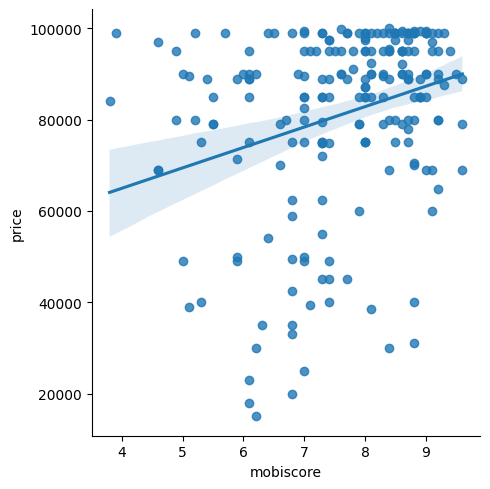

In [17]:
sns.lmplot(x='mobiscore', y='price', data=raw_df.head(500)) 

In [18]:
correlation = raw_df['price'].corr(raw_df['mobiscore'])
print("Correlation:", correlation)

Correlation: 0.028894150104949567


### Work on the dataset

#### Change category type

In [91]:
raw_df['postcode'] = raw_df['postcode'].astype('category')

In [1]:
sns.swarmplot(x='postcode', y='mobiscore', data=raw_df.head(50)) 



NameError: name 'sns' is not defined

#### Checking attributes types

In [13]:
raw_df.dtypes

zimmo_code                object
type                      object
price                    float64
street                    object
number                    object
postcode                  object
city                      object
living_area(m²)          float64
ground_area(m²)          float64
bedroom                  float64
bathroom                 float64
garage                   float64
garden                      bool
EPC(kWh/m²)              float64
renovation_obligation     object
year_built               float64
mobiscore                float64
url                       object
dtype: object

#### Check to see if several attributes have NaN values

In [ ]:
## Drop these records
raw_df[raw_df[['bedroom']].isna().all(axis=1)]

,zimmo_code,type,price,street,number,postcode,city,living_area(m²),ground_area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation_obligation,year_built,mobiscore,url
3,L4X2D,Vakantiewoning (Huis),40000.0,Molenheidestraat,7,3530,Helchteren,45.0,NaN,NaN,NaN,NaN,False,NaN,False,NaN,5.3,https://www.zimmo.be/nl/helchteren-3530/te-koo...
12,L5Q5T,Andere (Huis),45000.0,Hepperstraat,6,3680,Maaseik,NaN,70.0,NaN,NaN,NaN,False,NaN,False,1850.0,7.7,https://www.zimmo.be/nl/maaseik-3680/te-koop/h...
31,L83B7,Rijwoning (Huis),40000.0,Kleine Gaffelstraat,18,9500,Geraardsbergen,30.0,30.0,NaN,NaN,NaN,False,690.0,True,1875.0,8.8,https://www.zimmo.be/nl/geraardsbergen-9500/te...
33,L5O5X,Vakantiewoning (Huis),42500.0,Parelstrand,154,3920,Lommel,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,6.8,https://www.zimmo.be/nl/lommel-3920/te-koop/hu...
34,L7MF9,Appartement,38500.0,Dorlodotlaan,8,8670,Koksijde,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1975.0,8.1,https://www.zimmo.be/nl/koksijde-8670/te-koop/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25310,KA0AP,Gemengd gebruik (Huis),2650000.0,Meensesteenweg,298,8501,Bissegem,NaN,1168.0,NaN,NaN,NaN,False,158.0,False,NaN,8.7,https://www.zimmo.be/nl/bissegem-8501/te-koop/...
25326,KRE0X,Woning (Huis),1500000.0,Nieuwe Steenweg,183,8420,Klemskerke,NaN,1459.0,NaN,NaN,NaN,False,738.0,True,1970.0,7.8,https://www.zimmo.be/nl/klemskerke-8420/te-koo...
25339,KPG3V,Appartement,2700000.0,NaN,NaN,8620,Nieuwpoort,293.0,NaN,NaN,NaN,NaN,False,204.0,False,1992.0,7.7,https://www.zimmo.be/nl/nieuwpoort-8620/te-koo...
25361,KLDH7,Gemengd gebruik (Huis),1999000.0,Paleisstraat,103,2018,Antwerpen,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,9.5,https://www.zimmo.be/nl/antwerpen-2018/te-koop...


In [ ]:

raw_df[raw_df[['bedroom', 'bathroom']].isna().all(axis=1)]

,zimmo_code,type,price,street,number,postcode,city,living_area(m²),ground_area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation_obligation,year_built,mobiscore,url
3,L4X2D,Vakantiewoning (Huis),40000.0,Molenheidestraat,7,3530,Helchteren,45.0,NaN,NaN,NaN,NaN,False,NaN,False,NaN,5.3,https://www.zimmo.be/nl/helchteren-3530/te-koo...
12,L5Q5T,Andere (Huis),45000.0,Hepperstraat,6,3680,Maaseik,NaN,70.0,NaN,NaN,NaN,False,NaN,False,1850.0,7.7,https://www.zimmo.be/nl/maaseik-3680/te-koop/h...
31,L83B7,Rijwoning (Huis),40000.0,Kleine Gaffelstraat,18,9500,Geraardsbergen,30.0,30.0,NaN,NaN,NaN,False,690.0,True,1875.0,8.8,https://www.zimmo.be/nl/geraardsbergen-9500/te...
33,L5O5X,Vakantiewoning (Huis),42500.0,Parelstrand,154,3920,Lommel,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,6.8,https://www.zimmo.be/nl/lommel-3920/te-koop/hu...
34,L7MF9,Appartement,38500.0,Dorlodotlaan,8,8670,Koksijde,NaN,NaN,NaN,NaN,NaN,False,NaN,False,1975.0,8.1,https://www.zimmo.be/nl/koksijde-8670/te-koop/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25289,KW4NR,Villa (Huis),1850000.0,Doornpark,7,9120,Beveren-Waas,910.0,2785.0,NaN,NaN,NaN,False,95.0,False,NaN,7.7,https://www.zimmo.be/nl/beveren-waas-9120/te-k...
25310,KA0AP,Gemengd gebruik (Huis),2650000.0,Meensesteenweg,298,8501,Bissegem,NaN,1168.0,NaN,NaN,NaN,False,158.0,False,NaN,8.7,https://www.zimmo.be/nl/bissegem-8501/te-koop/...
25326,KRE0X,Woning (Huis),1500000.0,Nieuwe Steenweg,183,8420,Klemskerke,NaN,1459.0,NaN,NaN,NaN,False,738.0,True,1970.0,7.8,https://www.zimmo.be/nl/klemskerke-8420/te-koo...
25339,KPG3V,Appartement,2700000.0,NaN,NaN,8620,Nieuwpoort,293.0,NaN,NaN,NaN,NaN,False,204.0,False,1992.0,7.7,https://www.zimmo.be/nl/nieuwpoort-8620/te-koo...


In [30]:
raw_df[raw_df[['EPC(kWh/m²)', 'renovation_obligation', 'year_built']].isna().all(axis=1)]

,zimmo_code,type,price,street,number,postcode,city,living_area(m²),ground_area(m²),bedroom,bathroom,garage,garden,EPC(kWh/m²),renovation_obligation,year_built,mobiscore,url
1,L9SVC,Appartement,45000.0,NaN,NaN,5570,Beauraing,62.0,NaN,2.0,1.0,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/beauraing-5570/te-koop...
25,KLWPI,Eengezinswoning (Huis),28500.0,NaN,NaN,7370,Dour,NaN,196.0,2.0,NaN,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/dour-7370/te-koop/huis...
37,L5AWE,Eengezinswoning (Huis),45000.0,Rue du Vert Velu,8,7608,Wiers,90.0,NaN,2.0,1.0,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/wiers-7608/te-koop/hui...
43,KVO7C,Chalet (Huis),29000.0,NaN,NaN,4920,Aywaille,3123.0,700.0,1.0,1.0,NaN,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/aywaille-4920/te-koop/...
44,L3Q5V,Gemengd gebruik (Huis),25000.0,Rue Appâa,15,7340,Wasmes,NaN,NaN,NaN,NaN,1.0,False,NaN,NaN,NaN,NaN,https://www.zimmo.be/nl/wasmes-7340/te-koop/hu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,L23QB,Herenwoning (Huis),5000000.0,NaN,NaN,1000,Brussel,NaN,NaN,4.0,NaN,NaN,False,NaN,NaN,NaN,9.7,https://www.zimmo.be/nl/brussel-1000/te-koop/h...
25196,L23Q1,Woning (Huis),2200000.0,Wayezstraat,NaN,1070,Anderlecht,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,9.6,https://www.zimmo.be/nl/anderlecht-1070/te-koo...
25203,L23QV,Gemengd gebruik (Huis),2900000.0,NaN,NaN,1000,Brussel,600.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,9.7,https://www.zimmo.be/nl/brussel-1000/te-koop/h...
25306,KWJC2,Woning (Huis),2300000.0,NaN,NaN,1050,Elsene,600.0,750.0,3.0,NaN,1.0,False,NaN,NaN,NaN,9.5,https://www.zimmo.be/nl/elsene-1050/te-koop/hu...


In [24]:
correlation = raw_df['bedroom'].corr(raw_df['living_area(m²)'])
print("Correlation:", correlation)

Correlation: 0.04776507923790415


#### Dropping the url columns

In [115]:
clean_df = raw_df.drop(columns={'url'})

In [77]:
raw_df['price'].mean()

np.float64(526991.0466444908)

### Comparing attributes with price

In [58]:
df_n_bedrooms = raw_df[~raw_df[['bedroom']].isna().all(axis=1)]

In [59]:
avg_price_before = df_n_bedrooms['price'].mean()
avg_price_before

np.float64(542169.1577960246)

#### Excluding EPC

In [66]:
corr_EPC = df_n_bedrooms['price'].corr(df_n_bedrooms['EPC(kWh/m²)'])
print(f"Correlation between EPC and price {corr_EPC}")

Correlation between EPC and price -0.08285424760200585


In [86]:
df_n_bedrooms[df_n_bedrooms['EPC(kWh/m²)'].notna()]['price'].mean()

np.float64(531790.582530695)

In [ ]:
df_n_EPC = df_n_bedrooms[~df_n_bedrooms[['EPC(kWh/m²)']].isna().all(axis=1)]
print(f"Average without EPC attribute {df_n_EPC['price'].mean()}")

 Average without EPC attribute 531790.582530695


#### Excluding year_built

In [ ]:
df_n_year = df_n_bedrooms[~df_n_bedrooms[['year_built']].isna().all(axis=1)]
print(f"Average without year_built attribute {df_n_year['price'].mean()}")

 Average without year_built attribute 562942.6589981682


#### Excluding renovation_obligation

In [ ]:
df_n_ren = df_n_bedrooms[~df_n_bedrooms[['renovation_obligation']].isna().all(axis=1)]
print(f" Average without renovation_obligation attribute {df_n_ren['price'].mean()}")


 Average without renovation_obligation attribute 542408.206654972


4045

In [92]:
df_n_mobi = df_n_bedrooms[~df_n_bedrooms[['mobiscore']].isna().all(axis=1)]
print(f" Average without mobiscore attribute {df_n_mobi['price'].mean()}")


 Average without mobiscore attribute 563950.8678374153


<Axes: xlabel='living_area(m²)', ylabel='price'>

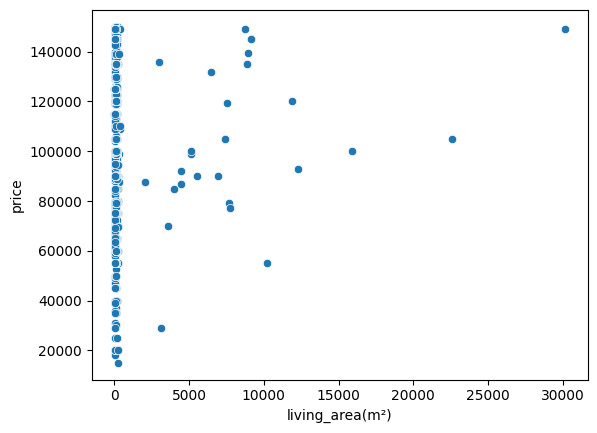

In [97]:
sns.scatterplot(x='living_area(m²)', y='price', data = df_n_bedrooms.head(1000))